# Initialize

In [1]:
#  Python Modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
# import requests
import json
import math
import itertools
from cycler import cycler
import plotly

import imp

# Custom Modules
import CensusData
import CovidData
import CovidFunctions
import CovidFunctionsPlotly

# imp.reload(CovidData)

# Covid Data    
https://covidtracking.com/api  
https://github.com/nytimes/covid-19-data

## Download and Import Data

In [2]:
# Census Data
dfStateData = CensusData.StateData()

# Covid Data
dfCovid = CovidData.combine_data()

# State Level Events
dfEvents = pd.read_csv('Events.txt',parse_dates=[1])

https://api.census.gov/data/2019/pep/population?get=POP&for=state:*
Population data API call result: 200 OK
https://api.census.gov/data/2010/dec/sf1?get=NAME&for=state:*
State name API call result: 200 OK
https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv
https://covidtracking.com/api/v1/states/daily.csv


# Data Analysis

## Merge Data

In [3]:
col = dfCovid.loc[: , ["cases(NYT)","positive(CTP)"]]
dfCovid['positive_cases'] = col.mean(axis=1)

col = dfCovid.loc[: , ["deaths(NYT)","death(CTP)"]]
dfCovid['deaths'] = col.mean(axis=1)

print(dfCovid.columns.values)

['cases(NYT)' 'deaths(NYT)' 'positive(CTP)' 'negative(CTP)' 'pending(CTP)'
 'hospitalizedCurrently(CTP)' 'hospitalizedCumulative(CTP)'
 'inIcuCurrently(CTP)' 'inIcuCumulative(CTP)' 'onVentilatorCurrently(CTP)'
 'onVentilatorCumulative(CTP)' 'recovered(CTP)' 'dateChecked(CTP)'
 'death(CTP)' 'hospitalized(CTP)' 'totalTestResults(CTP)'
 'deathIncrease(CTP)' 'hospitalizedIncrease(CTP)' 'negativeIncrease(CTP)'
 'positiveIncrease(CTP)' 'totalTestResultsIncrease(CTP)' 'positive_cases'
 'deaths']


## Deaths correlated to cases from previous days

In [4]:
shiftSearch = 30
fipsList = dfCovid.index.get_level_values(0).unique().astype(int).sort_values().astype(str)

dfShiftCor = CovidFunctions.correlations(shiftSearch, dfCovid, fipsList)

C:\Users\Scott\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning:

divide by zero encountered in log

C:\Users\Scott\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\Scott\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning:

divide by zero encountered in true_divide



Completed 30 days of case-death correlations and auto-correlations.


## State level analysis

In [5]:
firstDate = dfCovid.index.get_level_values(1).min()
currentDate = dfCovid.index.get_level_values(1).max()
plotDateRange = [firstDate, currentDate]    

In [6]:
imp.reload(CovidFunctions)
imp.reload(CovidFunctionsPlotly)

# Create plots for each state
for fips in fipsList:
    if int(fips) in [int(i) for i in dfStateData.index.tolist()]:
        CovidFunctions.state_plot(dfCovid, dfShiftCor, dfStateData, dfEvents, fips, plotDateRange)
        plt.close()
        CovidFunctionsPlotly.state_plot(dfCovid, dfShiftCor, dfStateData, dfEvents, fips, plotDateRange)
    else:
        print('Did not create plot for FIPS = ' + fips)
        
# Update index.md
CovidFunctionsPlotly.githubIndex(dfStateData, fipsList)
        
print('Finished Creating all State plots')

C:\Users\Scott\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()

C:\Users\Scott\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead



Did not create plot for FIPS = 60
Did not create plot for FIPS = 66
Did not create plot for FIPS = 69
Did not create plot for FIPS = 78
Finished Creating all State plots


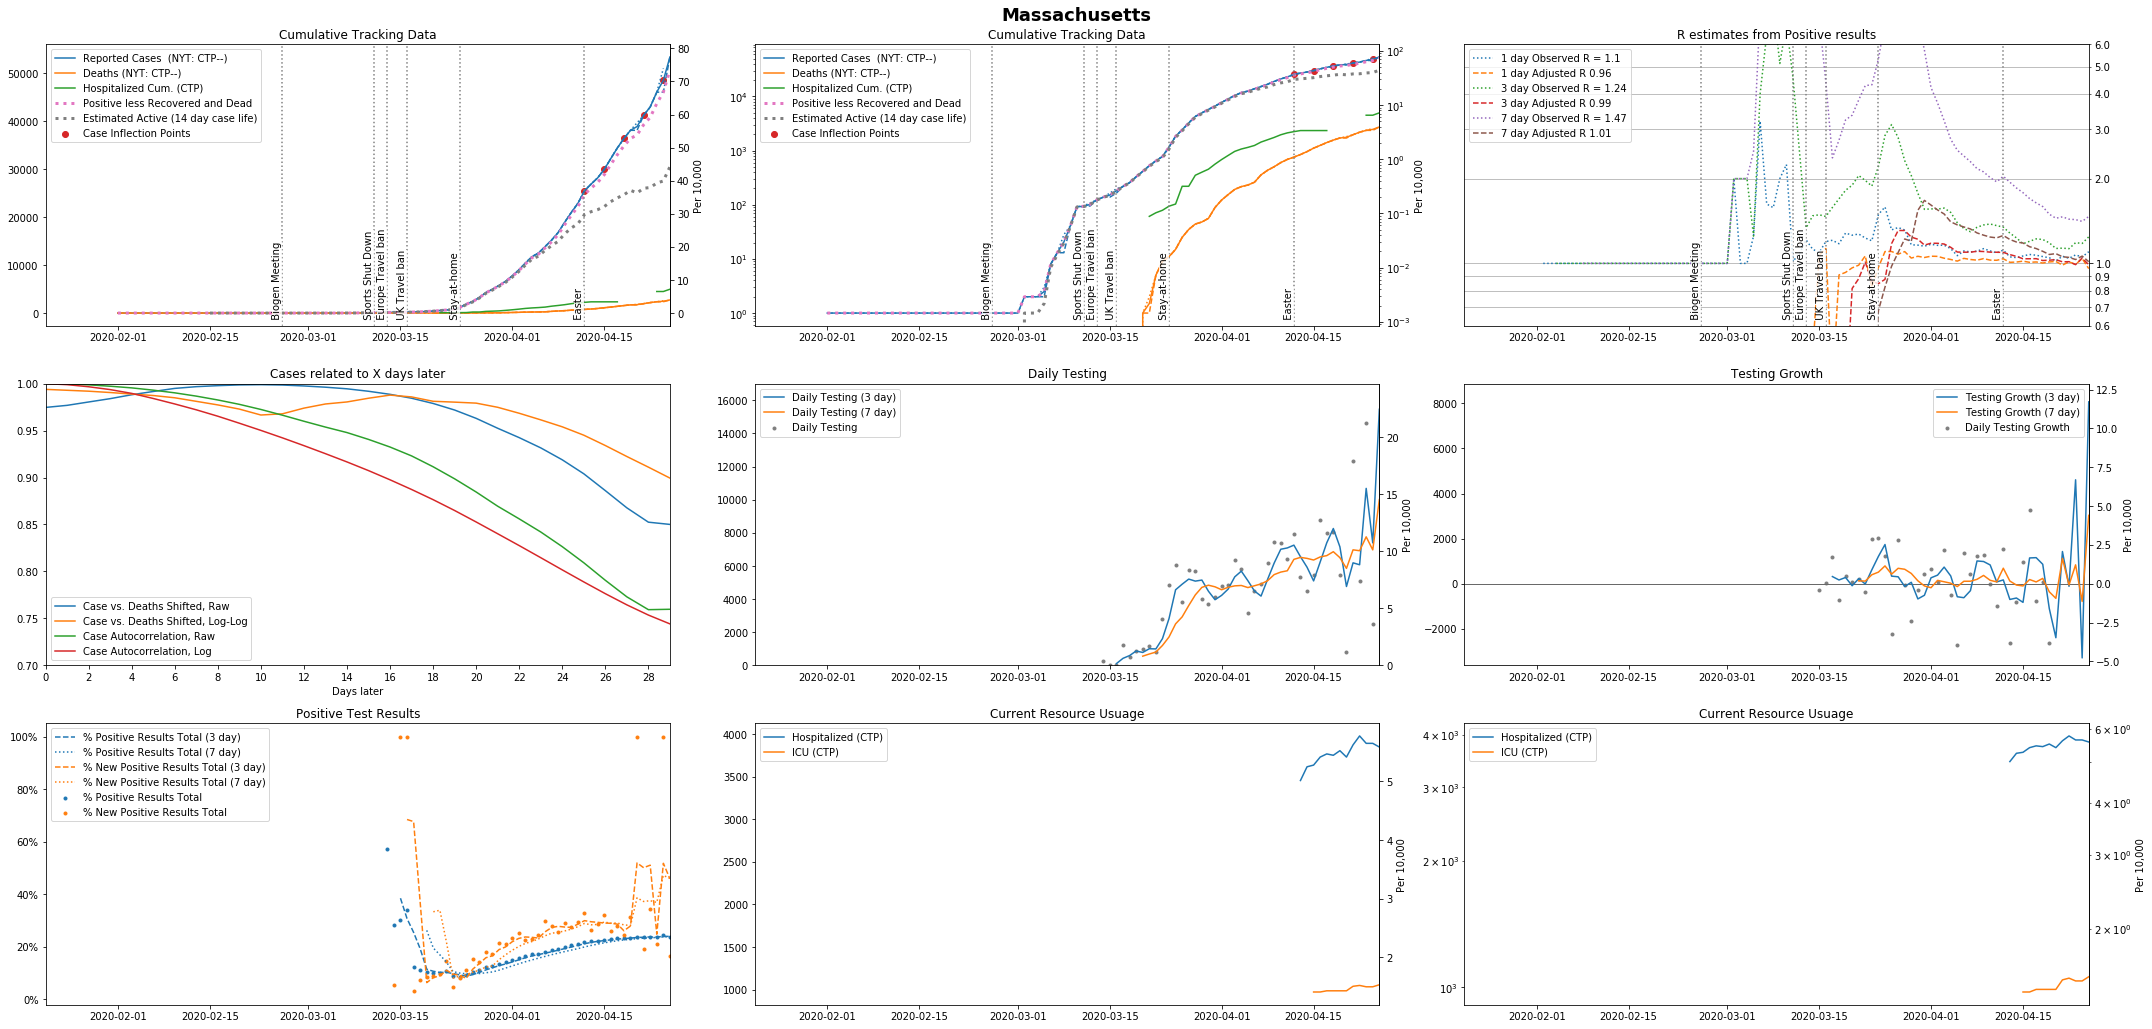

In [8]:
imp.reload(CovidFunctions)

fips = '25'
# plt.plot(dfCovid.loc[fips]['positive_cases'])

CovidFunctions.state_plot(dfCovid, dfShiftCor, dfStateData, dfEvents, fips, plotDateRange)


In [233]:
imp.reload(CovidFunctionsPlotly)
fips = '25'

CovidFunctionsPlotly.state_plot(dfCovid, dfShiftCor, dfStateData, dfEvents, fips, plotDateRange)

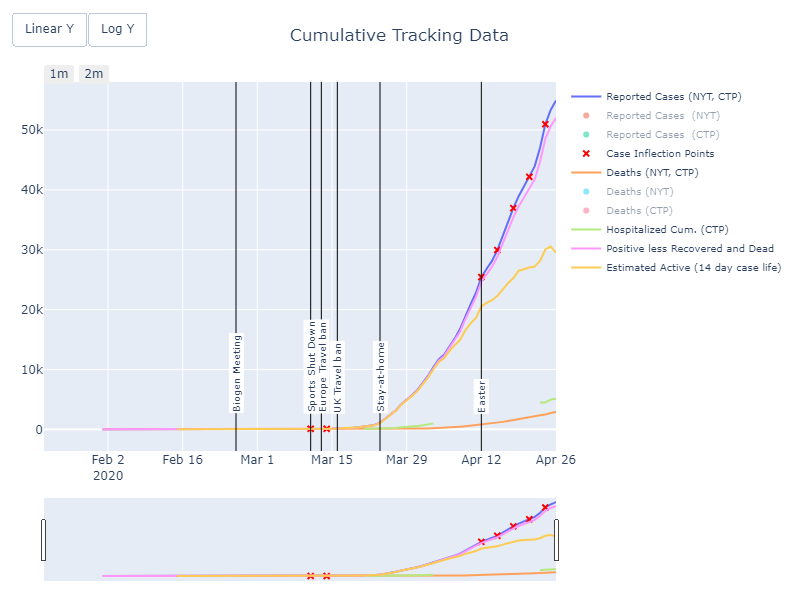

In [238]:
imp.reload(CovidFunctionsPlotly)
fips = '25'
fig = CovidFunctionsPlotly.tracking_plot(dfCovid, fips, plotDateRange)
fig = CovidFunctionsPlotly.event_markers(fig, dfEventsState)

fig.show()


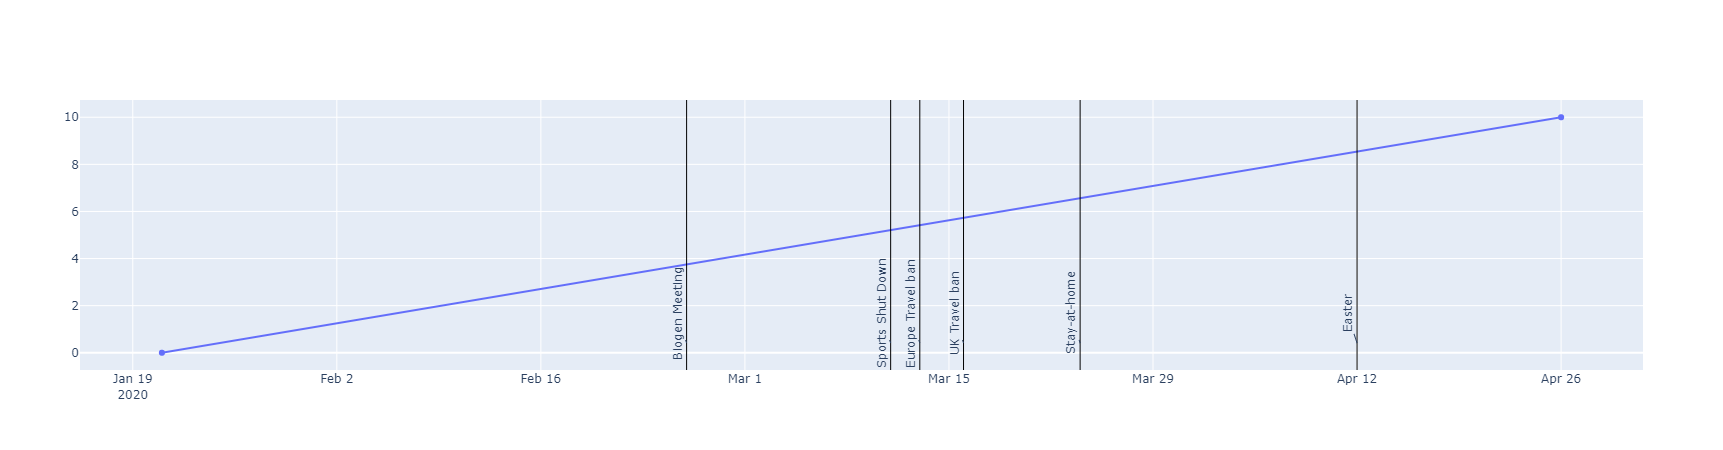

(layout.Annotation({
    'text': 'Easter', 'textangle': -90, 'x': datetime.datetime(2020, 4, 12, 0, 0), 'y': 0.1, 'yref': 'paper'
}), layout.Annotation({
    'text': 'Europe Travel ban', 'textangle': -90, 'x': datetime.datetime(2020, 3, 13, 0, 0), 'y': 0.1, 'yref': 'paper'
}), layout.Annotation({
    'text': 'UK Travel ban', 'textangle': -90, 'x': datetime.datetime(2020, 3, 16, 0, 0), 'y': 0.1, 'yref': 'paper'
}), layout.Annotation({
    'text': 'Sports Shut Down', 'textangle': -90, 'x': datetime.datetime(2020, 3, 11, 0, 0), 'y': 0.1, 'yref': 'paper'
}), layout.Annotation({
    'text': 'Stay-at-home', 'textangle': -90, 'x': datetime.datetime(2020, 3, 24, 0, 0), 'y': 0.1, 'yref': 'paper'
}), layout.Annotation({
    'text': 'Biogen Meeting', 'textangle': -90, 'x': datetime.datetime(2020, 2, 26, 0, 0), 'y': 0.1, 'yref': 'paper'
}))
[{'text': 'Easter', 'x': datetime.datetime(2020, 4, 12, 0, 0), 'y': 0.1, 'yref': 'paper', 'textangle': -90}, {'text': 'Europe Travel ban', 'x': datetime.dateti

In [220]:
imp.reload(CovidFunctionsPlotly)
from datetime import datetime, timedelta
import plotly.graph_objects as go
# fig = CovidFunctionsPlotly.tracking_plot(dfCovid, fips, plotDateRange)

fig = go.Figure()

fig.add_trace(go.Scatter(x = plotDateRange, y = [0, 10]))
# fig.update_layout(xaxis_range = plotDateRange)

dfEventsAll = dfEvents.groupby('FIPS').get_group('All')
if str(fips).zfill(2) in dfEvents.groupby('FIPS').groups.keys():
    dfEventsState = dfEventsAll.append(dfEvents.groupby('FIPS').get_group(str(fips).zfill(2)))
else:
    dfEventsState = dfEventsAll  
        
# fig = CovidFunctionsPlotly.event_markers(fig, dfEventsState)

annotates = []
for index, eventData in dfEventsState.iterrows():
    date = datetime.strptime(eventData['Date'], '%m/%d/%y')
    fig.add_shape(type = 'line',
                  xref = 'x',
                  yref = 'paper',
                  x0 = date,
                  y0 = 0,
                  x1 = date,
                  y1 = 1,
                  line = dict(
                      color = 'Black',
                      width = 1))
    annotates = annotates + [dict(text = eventData['Event'],
                                         x = date,
                                         y = 0.1,
                                         yref = 'paper',
                                         textangle = -90)]
                                  
        
fig.update_layout(annotations = annotates)

fig.show()
print(fig.layout.annotations)
print(annotates)
# print(dfEventsState)

In [14]:
print(dfStateData.at[fips])

TypeError: _get_value() missing 1 required positional argument: 'col'

In [6]:
# Update index.md
imp.reload(CovidFunctionsPlotly)
CovidFunctionsPlotly.githubIndex(dfStateData, fipsList)